In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = '/kaggle/input/datasetmodul5/company_data.csv'
data = pd.read_csv(file_path)

### 1.Lakukan analisis eksploratif data untuk memahami karakteristik dasar dataset.

In [3]:
data.head()

,Unnamed: 0,company,employee_turnover,revenue_growth,rd_investment,operational_cost,average_salary,market_volatility,average_tenure,growth_potential,net_profit
0,0,Company_1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Company_2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Company_3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Company_4,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Company_5,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


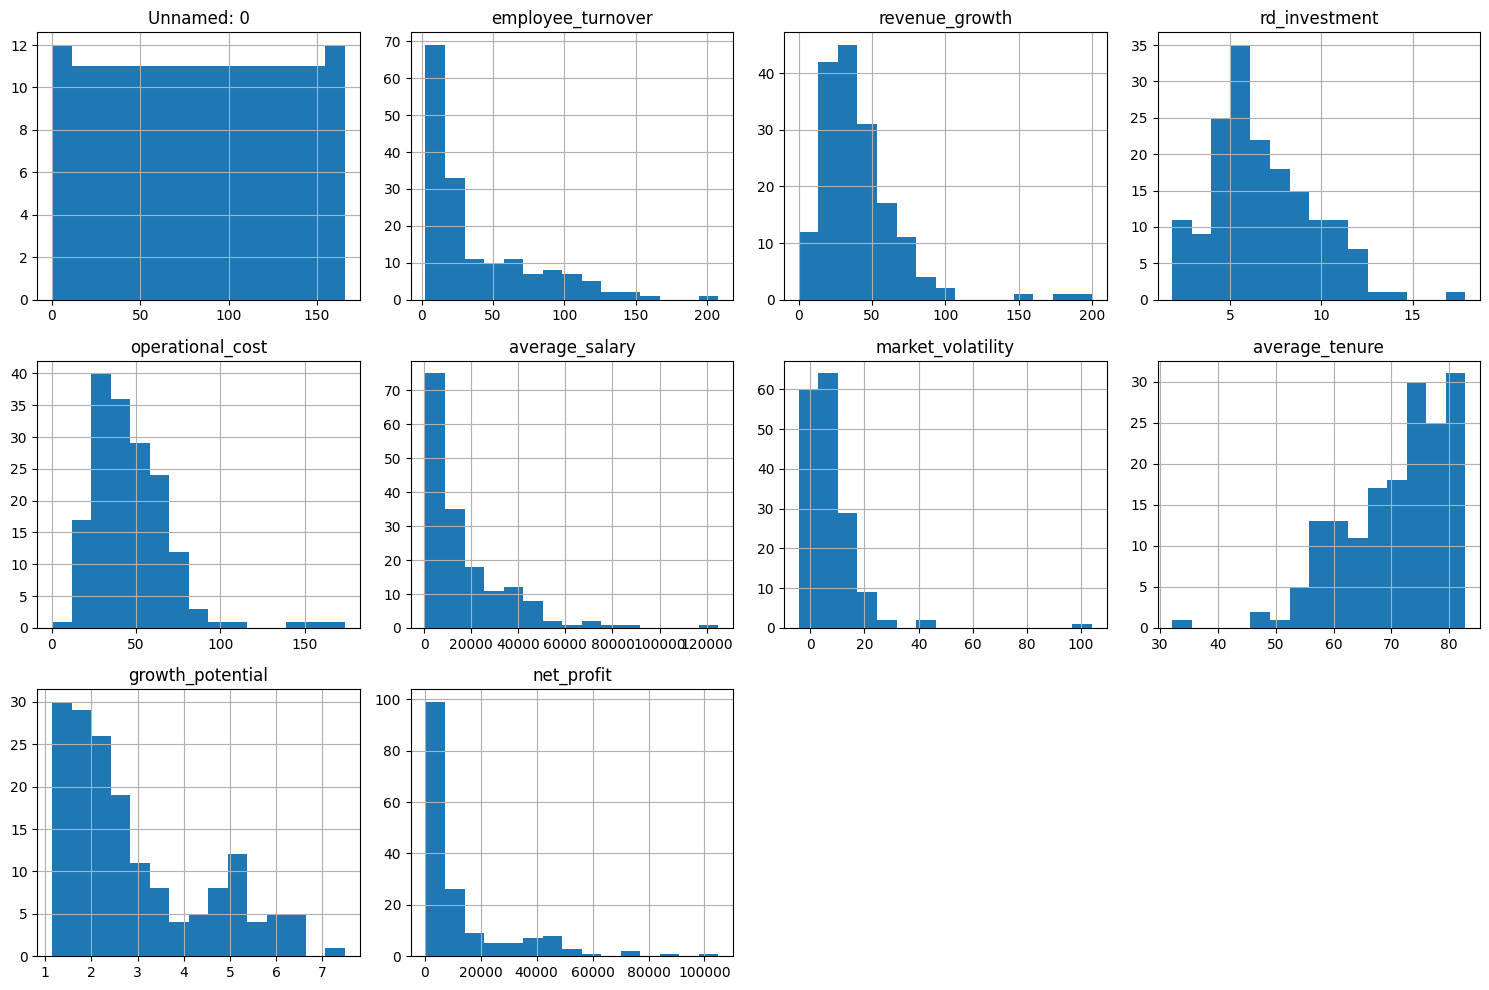

(       Unnamed: 0  employee_turnover  revenue_growth  rd_investment  \
 count   167.00000         167.000000      167.000000     167.000000   
 mean     83.00000          38.270060       41.108976       6.815689   
 std      48.35287          40.328931       27.412010       2.746837   
 min       0.00000           2.600000        0.109000       1.810000   
 25%      41.50000           8.250000       23.800000       4.920000   
 50%      83.00000          19.300000       35.000000       6.320000   
 75%     124.50000          62.100000       51.350000       8.600000   
 max     166.00000         208.000000      200.000000      17.900000   
 
        operational_cost  average_salary  market_volatility  average_tenure  \
 count        167.000000      167.000000         167.000000      167.000000   
 mean          46.890215    17144.688623           7.781832       70.555689   
 std           24.209589    19278.067698          10.570704        8.893172   
 min            0.065900      609.

In [4]:
# Statistik dari dataset
statistical_summary = data.describe()

# Cek missing value
missing_values = data.isnull().sum()

# Memplot histogram untuk setiap fitur numerik
data.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

statistical_summary, missing_values

Dataset terdiri dari 167 perusahaan.
Fitur seperti employee_turnover, revenue_growth, dan average_salary memiliki variasi yang cukup besar, seperti yang ditunjukkan oleh standar deviasi yang tinggi.
Fitur lain seperti growth_potential dan rd_investment menunjukkan variasi yang lebih sedikit.

Dalam dataset ini tidak ada missing values.

### 2.Gunakan teknik clustering untuk mengelompokkan perusahaan berdasarkan karakteristik yang diberikan. Tentukan jumlah cluster yang optimal dan jelaskan pemilihan Anda.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

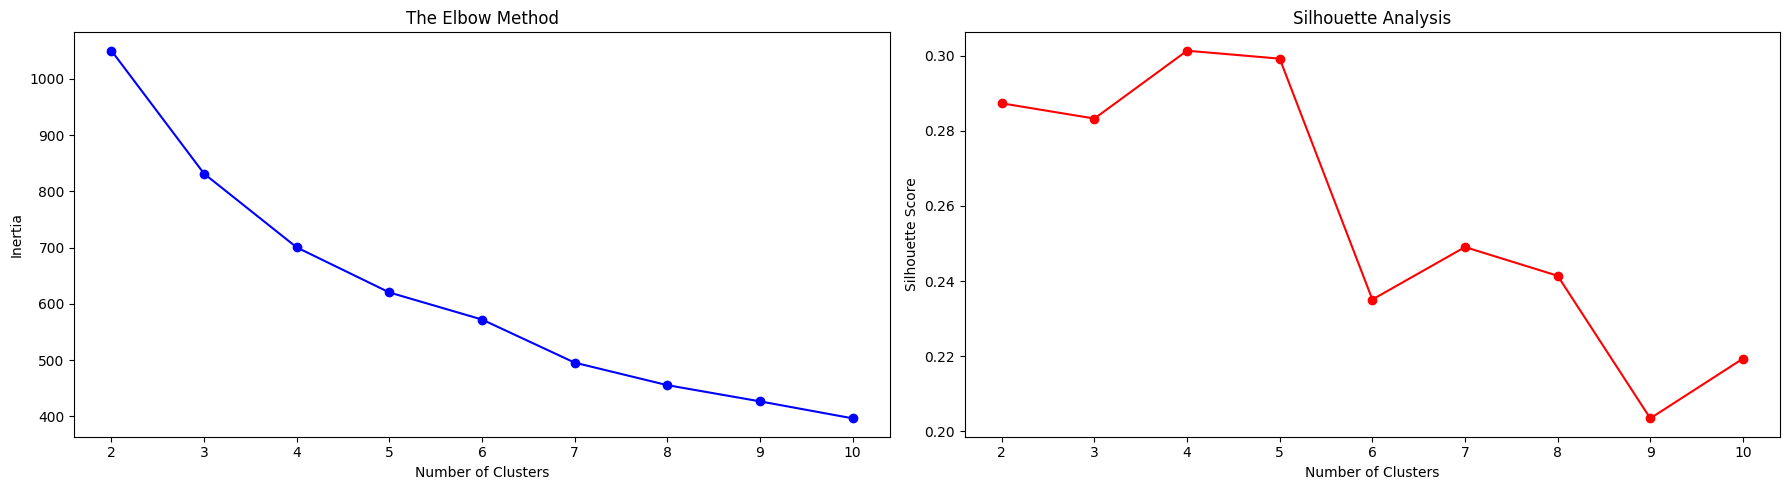

[0.28735668921406704,
 0.28329575683463126,
 0.301375962376881,
 0.2992594995920442,
 0.2350698927516289,
 0.24905003461730515,
 0.2414024552159115,
 0.20340692932613638,
 0.21931388763003506]

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["Unnamed: 0", "company"]))

# Menemukan jumlah cluster yang optimal dengan menggunakan Elbow Method dan Silhouette Score
inertia = []
silhouette_scores = []
range_values = range(2, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting 
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range_values, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range_values, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

silhouette_scores


Berdasarkan data yang didapat, jumlah cluster yang bagus terletak pada nomor 4. Karena mendapat score paling tinggi pada Silhouette coefficient

In [6]:
data.drop(['Unnamed: 0', 'company'], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_turnover  167 non-null    float64
 1   revenue_growth     167 non-null    float64
 2   rd_investment      167 non-null    float64
 3   operational_cost   167 non-null    float64
 4   average_salary     167 non-null    int64  
 5   market_volatility  167 non-null    float64
 6   average_tenure     167 non-null    float64
 7   growth_potential   167 non-null    float64
 8   net_profit         167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/con

Distribusi Data dalam Setiap Cluster:
Cluster
0    87
1    47
2    30
3     3
Name: count, dtype: int64

Analisis Karakteristik Setiap Cluster:
         employee_turnover  revenue_growth  rd_investment  operational_cost  \
Cluster                                                                       
0                21.389655       41.290678       6.235862         48.038689   
1                92.961702       29.151277       6.388511         42.323404   
2                 4.953333       45.826667       9.168667         39.736667   
3                 4.133333      176.000000       6.793333        156.666667   

         average_salary  market_volatility  average_tenure  growth_potential  \
Cluster                                                                        
0          12968.620690           7.413460       72.935632          2.286552   
1           3942.404255          12.019681       59.187234          5.008085   
2          45250.000000           2.742200       80.376667   

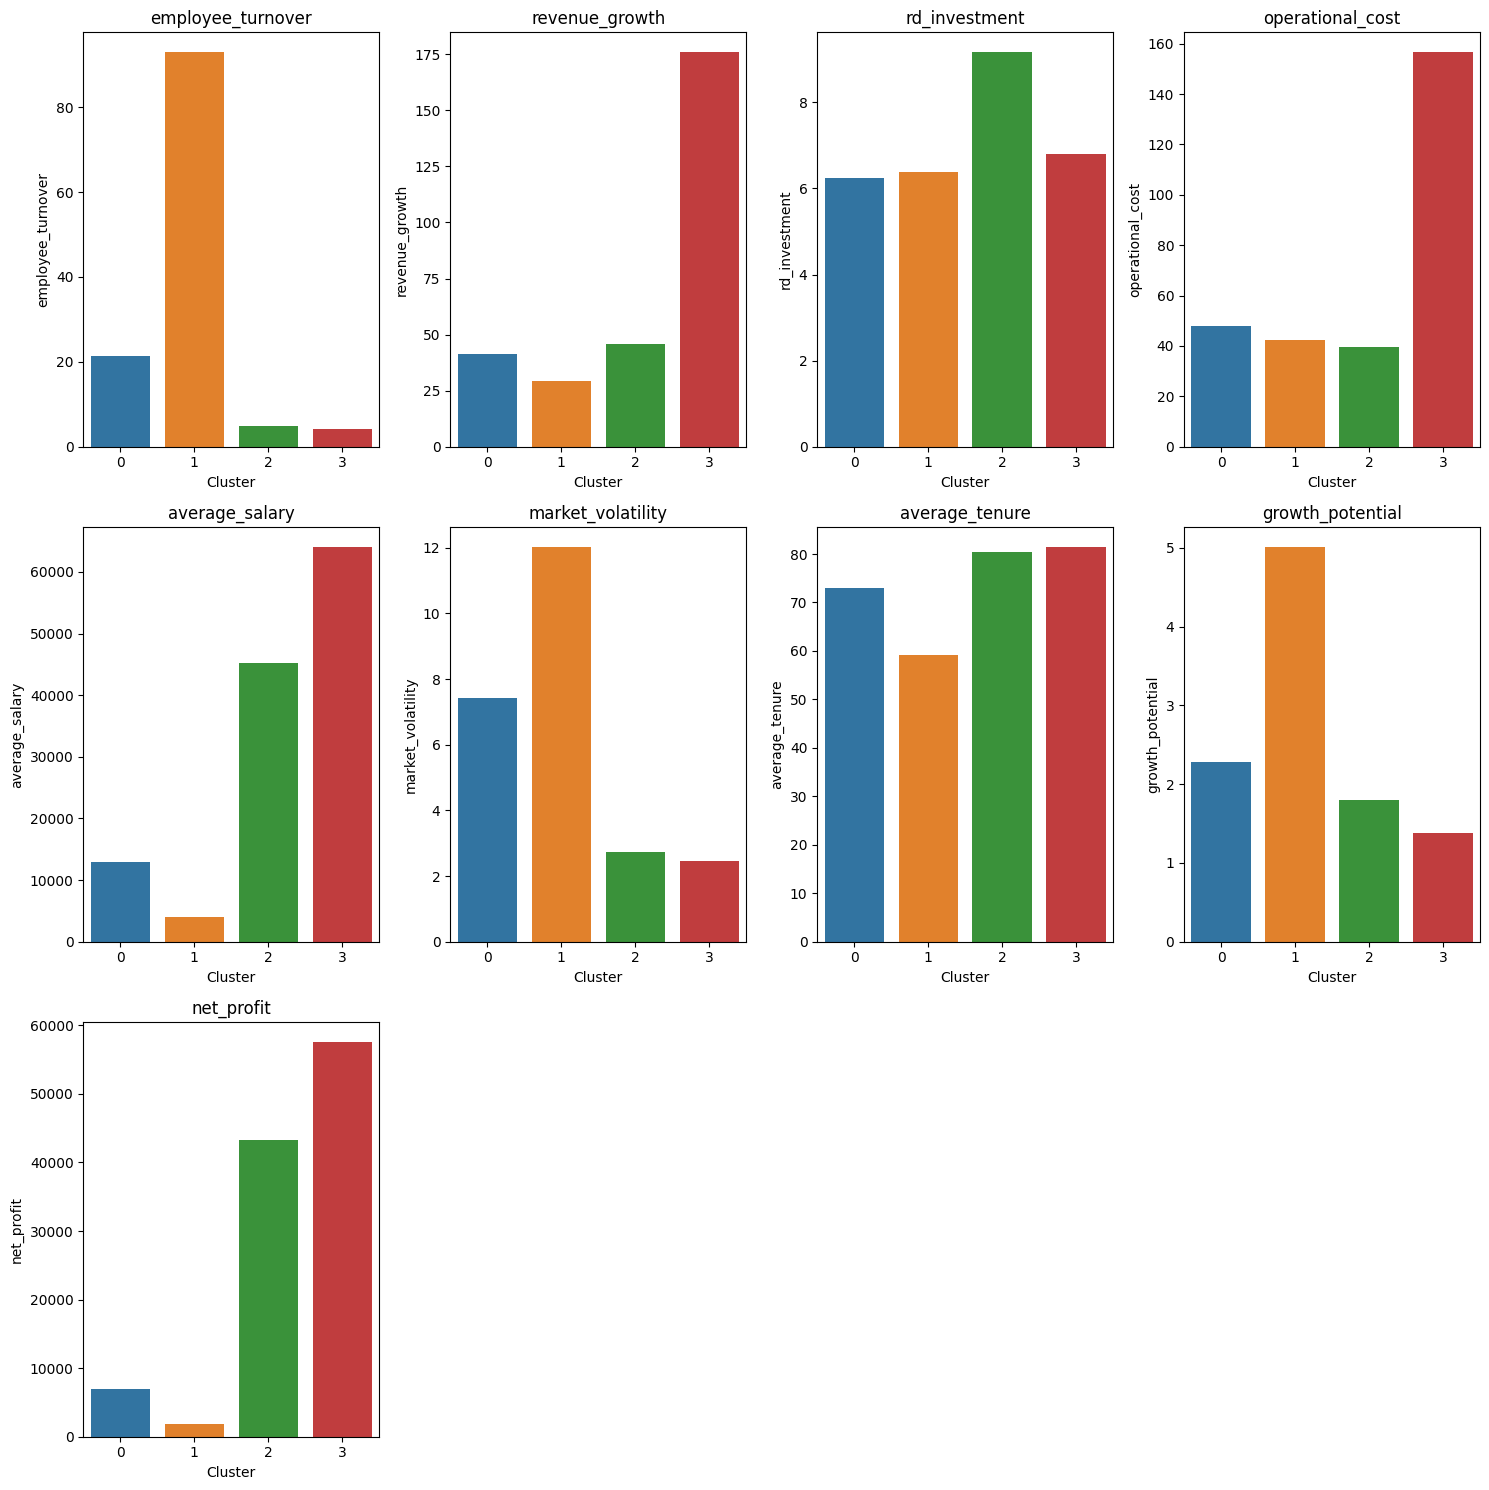

In [8]:
# Melakukan clustering dengan 4 cluster
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Melihat distribusi data dalam setiap cluster
cluster_distribution = data['Cluster'].value_counts()

# Analisis karakteristik setiap cluster
cluster_means = data.groupby('Cluster').mean()

# Plotting the mean values of the features for each cluster
plt.figure(figsize=(15, 15))
for i, col in enumerate(cluster_means.columns):
    plt.subplot(3, 4, i + 1)
    sns.barplot(x=cluster_means.index, y=cluster_means[col])
    plt.title(col)
plt.tight_layout()

# Menampilkan distribusi data dalam setiap cluster
print("Distribusi Data dalam Setiap Cluster:")
print(cluster_distribution)

# Menampilkan analisis karakteristik setiap cluster
print("\nAnalisis Karakteristik Setiap Cluster:")
print(cluster_means)


### Karakteristik dari setiap cluster

* Cluster 0

Pergantian Karyawan: Sedang,
Pertumbuhan Pendapatan: Sedang,
Investasi R&D: Sedang,
Biaya Operasional: Sedang,
Gaji Rata-rata: Sedang,
Volatilitas Pasar: Sedang,
Masa Kerja Rata-rata: Tinggi,
Potensi Pertumbuhan: Rendah,
Laba Bersih: Sedang

Cluster ini mungkin mewakili perusahaan yang stabil, dengan pertumbuhan dan laba bersih yang sedang, dan investasi R&D yang seimbang.

* Cluster 1

Pergantian Karyawan: Tinggi,
Pertumbuhan Pendapatan: Rendah,
Investasi R&D: Sedang,
Biaya Operasional: Rendah,
Gaji Rata-rata: Rendah,
Volatilitas Pasar: Tinggi,
Masa Kerja Rata-rata: Rendah,
Potensi Pertumbuhan: Tinggi,
Laba Bersih: Rendah.

Cluster ini mungkin mencakup perusahaan yang menghadapi tantangan, dengan pergantian karyawan tinggi dan laba bersih rendah, tetapi memiliki potensi pertumbuhan yang tinggi.

* Cluster 2

Pergantian Karyawan: Sangat Rendah,
Pertumbuhan Pendapatan: Tinggi,
Investasi R&D: Tinggi,
Biaya Operasional: Rendah,
Gaji Rata-rata: Tinggi,
Volatilitas Pasar: Rendah,
Masa Kerja Rata-rata: Sangat Tinggi,
Potensi Pertumbuhan: Rendah,
Laba Bersih: Sangat Tinggi.

Cluster ini sepertinya mewakili perusahaan mapan dengan laba bersih tinggi, investasi R&D yang signifikan, dan tingkat retensi karyawan yang baik.

* Cluster 3

Pergantian Karyawan: Sangat Rendah,
Pertumbuhan Pendapatan: Sangat Tinggi,
Investasi R&D: Sedang,
Biaya Operasional: Sangat Tinggi,
Gaji Rata-rata: Sangat Tinggi,
Volatilitas Pasar: Rendah,
Masa Kerja Rata-rata: Sangat Tinggi,
Potensi Pertumbuhan: Sangat Rendah,
Laba Bersih: Sangat Tinggi.

Cluster ini kemungkinan besar adalah perusahaan besar dan sangat sukses dengan pendapatan dan laba bersih yang sangat tinggi.

### Rekomendasi Strategis untuk Asosiasi Bisnis
* Cluster 0 (Perusahaan Stabil): Meningkatkan inovasi dan diversifikasi produk untuk mendorong pertumbuhan.
*Cluster 1 (Perusahaan dengan Tantangan): Fokus pada retensi karyawan dan efisiensi operasional untuk meningkatkan laba.
*Cluster 2 (Perusahaan Mapan): Terus berinvestasi dalam R&D dan ekspansi pasar untuk mempertahankan posisi pasar.
*Cluster 3 (Perusahaan Besar dan Sukses): Diversifikasi investasi dan fokus pada keberlanjutan untuk jangka panjang.